In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Conv2D,Flatten,MaxPooling2D,UpSampling2D,Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
import keras
from keras import layers,Model
from math import log10,sqrt

2025-05-15 02:42:13.922328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747276934.172274      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747276934.244355      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

train_path = '/kaggle/input/braintumour/Training'
test_path = '/kaggle/input/braintumour/Testing'

def load_images_from_folder(base_path):
    data = []
    for root, _, files in os.walk(base_path):
        for filename in files:
            if filename.endswith('.jpg'):
                img_path = os.path.join(root, filename)
                img = image.load_img(img_path, target_size=(128, 128))
                img = image.img_to_array(img)
                data.append(img)
    return np.array(data)

train = load_images_from_folder(train_path)
test = load_images_from_folder(test_path)

x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

# Confirm shapes
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (2870, 128, 128, 3)
x_test shape: (394, 128, 128, 3)


In [3]:
def show_data(X, n=10,title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

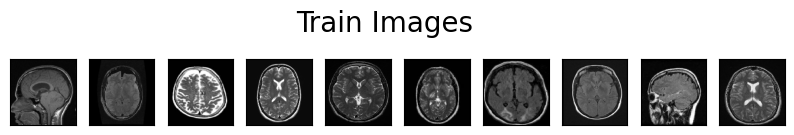

In [4]:
show_data(x_train,title= "Train Images")

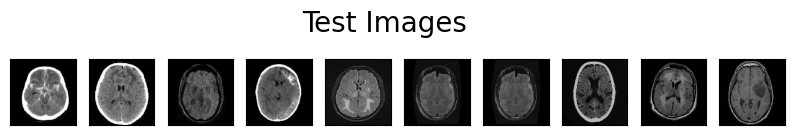

In [5]:
show_data(x_test,title= "Test Images")

In [6]:
input_img = Input(shape=(128, 128, 3))
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(input_img)
x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(x)
encoded = MaxPooling2D(pool_size = (2,2), padding = "same")(x)
x = Conv2D(64, kernel_size=(3,3), activation="relu", padding = "same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(128, kernel_size=(3,3), activation="relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, kernel_size=(3,3), activation="sigmoid", padding = "same")(x)

2025-05-15 02:42:52.833307: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["mean_squared_error"])
print(autoencoder.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 3)         │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,619 (748.51 KB)

 Trainable params: 191,619 (748.51 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
hist = autoencoder.fit(x_train,x_train,epochs = 5,batch_size = 4,validation_data = (x_test,x_test),verbose = 1)

Epoch 1/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 293s 404ms/step - loss: 0.3911 - mean_squared_error: 0.0168 - val_loss: 0.4011 - val_mean_squared_error: 0.0044
Epoch 2/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 288s 401ms/step - loss: 0.3493 - mean_squared_error: 0.0026 - val_loss: 0.3984 - val_mean_squared_error: 0.0035
Epoch 3/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 319s 397ms/step - loss: 0.3476 - mean_squared_error: 0.0021 - val_loss: 0.3968 - val_mean_squared_error: 0.0029
Epoch 4/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 332s 411ms/step - loss: 0.3499 - mean_squared_error: 0.0020 - val_loss: 0.3955 - val_mean_squared_error: 0.0025
Epoch 5/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 288s 400ms/step - loss: 0.3469 - mean_squared_error: 0.0018 - val_loss: 0.3949 - val_mean_squared_error: 0.0023
